In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# ---- SIMULATING THE DATASET
np.random.seed(42)
n_samples = 1000

In [17]:
# ---- FEATURES
photon_energy = np.random.uniform(1.5, 3.0, n_samples) # --- eV, photon range (energy range)
atomic_density = np.random.uniform(1e21, 1e23, n_samples) # -- atoms/m^3
temperature = np.random.uniform(50, 300, n_samples) # --- K
material_type = np.random.choice([1, 2, 3], n_samples) # --- 3 material types
photon_path_length = np.random.uniform(0.01, 0.1, n_samples) # -- m

In [18]:
# --- SIMULATED TARGET: NEGATIVE TIME DELAY (ps)
negative_time_delay = (
    - 0.1 * photon_energy**2 # -- quadratic relation with photon energy
    + 0.00002 * atomic_density # -- linear relation with atomic density
    - 0.05 * temperature # -- inverse relation with temperature
    + 0.2 * material_type # -- discrete material effect
    + 0.5 * photon_path_length ** 2 # -- nonlinear effect of path length
    + np.random.normal(0, 0.1, n_samples) # -- experimental noise
)

In [19]:
# --- DATAFRAME
simulated_data = pd.DataFrame({
    "photon_energy" : photon_energy,
    "atomic_density" : atomic_density,
    "temperature" : temperature,
    "material_type" : material_type,
    "photon_path_length" : photon_path_length,
    "negative_time_delay" : negative_time_delay
})

In [20]:
# --- SPLITTING DATA
X = simulated_data[["photon_energy", "atomic_density", "temperature", "material_type", "photon_path_length"]]
y = simulated_data["negative_time_delay"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# --- TRAINING RANDOM FOREST REGRESSOR
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# --- PREDICTIONS & METRICS
y_pred = random_forest_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"--- MEAN SQUARED ERROR: {mse}")
print(f"--- R2 SCORE: {r2}")

--- MEAN SQUARED ERROR: 8.749909366552452e+34
--- R2 SCORE: 0.7368432735137278


In [23]:
# --- FEATURE IMPORTANCE
feature_importance = random_forest_model.feature_importances_
features = X.columns

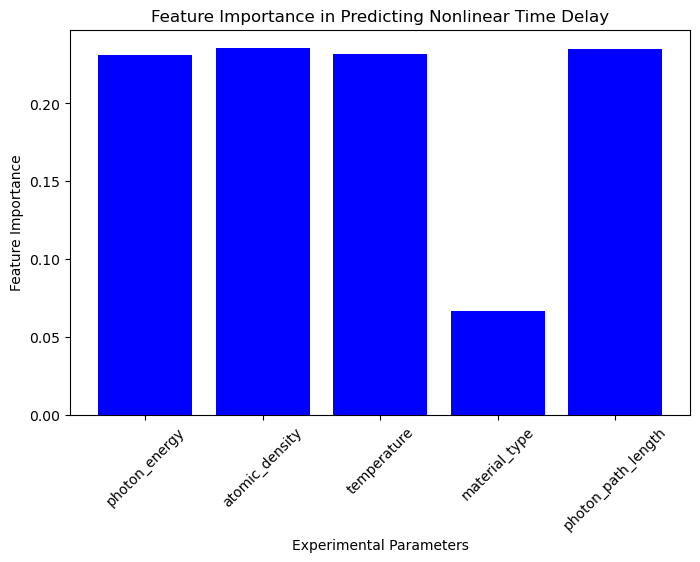

In [24]:
# --- FEATURE IMPORTANCE PLOT
plt.figure(figsize=(8, 5))
plt.bar(features, feature_importance, color="blue")
plt.xticks(rotation=45)
plt.title("Feature Importance in Predicting Nonlinear Time Delay")
plt.xlabel("Experimental Parameters")
plt.ylabel("Feature Importance")
plt.show()


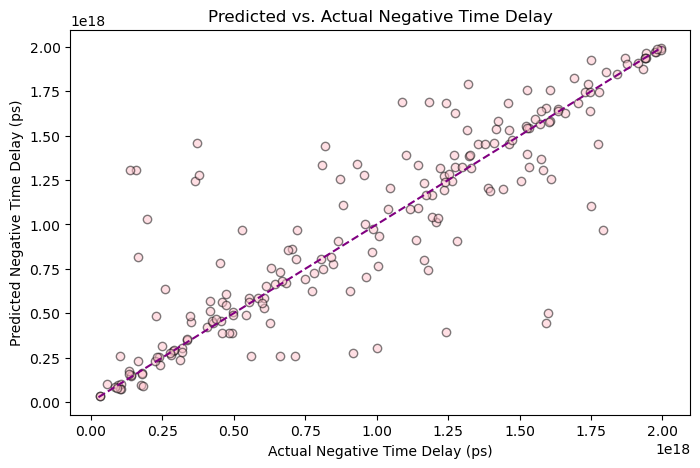

In [25]:
# --- PREDICTED VS. ACTUAL
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k', color='pink')
plt.title("Predicted vs. Actual Negative Time Delay")
plt.xlabel("Actual Negative Time Delay (ps)")
plt.ylabel("Predicted Negative Time Delay (ps)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="purple", linestyle="--") # --- PREDICTION LINE
plt.show()

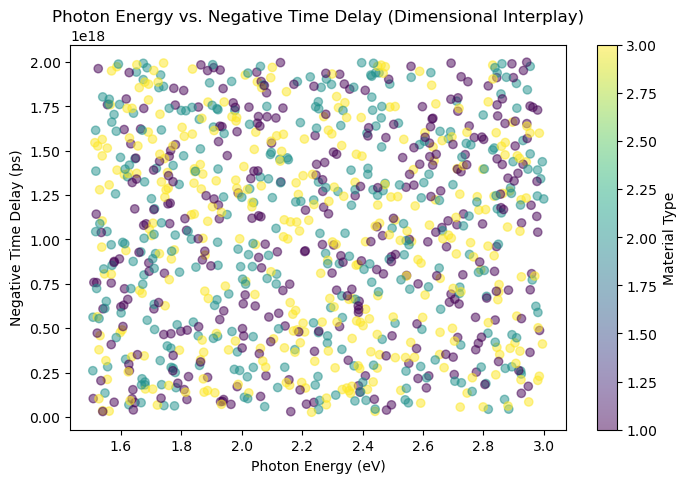

In [26]:
# --- PHOTON ENERGY VS NEGATIVE TIME DELAY PLOT
plt.figure(figsize=(8, 5))
plt.scatter(simulated_data["photon_energy"], simulated_data["negative_time_delay"], alpha=0.5, c=simulated_data["material_type"], cmap="viridis")
plt.title("Photon Energy vs. Negative Time Delay (Dimensional Interplay)")
plt.xlabel("Photon Energy (eV)")
plt.ylabel("Negative Time Delay (ps)")
plt.colorbar(label="Material Type")
plt.show()